___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [6]:
BAC = data.DataReader("BAC", 'stooq', '1/1/2006', '1/1/2016')
C = data.DataReader("C", 'stooq', '1/1/2006', '1/1/2016')
GS = data.DataReader("GS", 'stooq', '1/1/2006', '1/1/2016')
JPM = data.DataReader("JPM", 'stooq', '1/1/2006', '1/1/2016')
MS = data.DataReader("MS", 'stooq', '1/1/2006', '1/1/2016')
WFC = data.DataReader("WFC", 'stooq', '1/1/2006', '1/1/2016')

In [8]:
C

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,45.448,45.726,45.168,45.168,12914026.0
2015-12-30,46.122,46.208,45.607,45.648,10038648.0
2015-12-29,46.050,46.452,46.031,46.244,11632965.0
2015-12-28,45.884,45.884,45.352,45.718,10036797.0
2015-12-24,45.808,46.235,45.781,46.005,5351833.0
...,...,...,...,...,...
2006-01-09,421.370,422.580,418.760,419.550,1938531.0
2006-01-06,423.820,423.960,417.910,421.520,1580368.0
2006-01-05,419.980,422.930,419.640,421.520,1309385.0


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [7]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [12]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], keys=tickers, axis=1)
bank_stocks

BAC                                            C           \
              Open    High     Low   Close      Volume     Open     High   
Date                                                                       
2006-01-03  40.809  41.032  40.139  40.948  18736685.0  424.860  428.120   
2006-01-04  40.879  41.090  40.400  40.513  20416790.0  423.660  425.720   
2006-01-05  40.513  40.732  40.288  40.566  17042560.0  419.980  422.930   
2006-01-06  40.704  40.799  40.315  40.504  14480506.0  423.820  423.960   
2006-01-09  40.635  40.853  40.322  40.531  17957978.0  421.370  422.580   
...            ...     ...     ...     ...         ...      ...      ...   
2015-12-24  15.553  15.609  15.465  15.509  32708410.0   45.808   46.235   
2015-12-28  15.465  15.474  15.248  15.382  46478330.0   45.884   45.884   
2015-12-29  15.492  15.582  15.412  15.516  50809564.0   46.050   46.452   
2015-12-30  15.448  15.483  15.303  15.313  39001619.0   46.122   46.208   
2015-12-31  15.277  15.329  15.113  15.113  52415784.0   45.448   45.726   

                                          ...      MS                          \
                Low    Close      Volume  ...    Open    High     Low   Close   
Date                                      ...                                   
2006-01-03  417.120  427.370   1773436.0  ...  39.082  39.981  38.782  39.856   
2006-01-04  419.190  419.460   2157907.0  ...  40.128  40.524  39.888  39.888   
2006-01-05  419.640  421.520   1309385.0  ...  39.888  40.053  39.656  39.997   
2006-01-06  417.910  421.520   1580368.0  ...  40.175  40.226  39.683  40.037   
2006-01-09  418.760  419.550   1938531.0  ...  40.075  40.532  40.068  40.456   
...             ...      ...         ...  ...     ...     ...     ...     ...   
2015-12-24   45.781   46.005   5351833.0  ...  28.306  28.428  28.191  28.228   
2015-12-28   45.352   45.718  10036797.0  ...  28.124  28.124  27.766  27.957   
2015-12-29   46.031   46.244  11632965.0  ...  28.191  28.420  28.092  28.287   
2015-12-30   45.607   45.648  10038648.0  ...  28.247  28.372  27.984  28.010   
2015-12-31   45.168   45.168  12914026.0  ...  27.730  28.071  27.609  27.646   

                          WFC                                      
               Volume    Open    High     Low   Close      Volume  
Date                                                               
2006-01-03  6529839.0  23.367  23.646  23.072  23.588  14898523.0  
2006-01-04  9688256.0  23.511  23.526  23.187  23.315  14700535.0  
2006-01-05  7016817.0  23.292  23.329  23.149  23.292  13701382.0  
2006-01-06  8366983.0  23.354  23.492  23.211  23.423  11365256.0  
2006-01-09  5033086.0  23.423  23.526  23.329  23.423   7599922.0  
...               ...     ...     ...     ...     ...         ...  
2015-12-24  3219730.0  46.059  46.160  45.841  45.933   5966583.0  
2015-12-28  6236887.0  45.706  45.899  45.390  45.818   9892142.0  
2015-12-29  7350680.0  46.176  46.378  46.076  46.326   9422187.0  
2015-12-30  5819064.0  46.310  46.343  45.911  45.992   9567669.0  
2015-12-31  9376774.0  45.676  46.042  45.429  45.549  13043776.0  

[2517 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [13]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [14]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.809  41.032  40.139  40.948  18736685.0  424.86  428.12   
2006-01-04   40.879  41.090  40.400  40.513  20416790.0  423.66  425.72   
2006-01-05   40.513  40.732  40.288  40.566  17042560.0  419.98  422.93   
2006-01-06   40.704  40.799  40.315  40.504  14480506.0  423.82  423.96   
2006-01-09   40.635  40.853  40.322  40.531  17957978.0  421.37  422.58   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   417.12  427.37  1773436.0  ...  39.082  39.981  38.782  39.856   
2006-01-04   419.19  419.46  2157907.0  ...  40.128  40.524  39.888  39.888   
2006-01-05   419.64  421.52  1309385.0  ...  39.888  40.053  39.656  39.997   
2006-01-06   417.91  421.52  1580368.0  ...  40.175  40.226  39.683  40.037   
2006-01-09   418.76  419.55  1938531.0  ...  40.075  40.532  40.068  40.456   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6529839.0  23.367  23.646  23.072  23.588  14898523.0  
2006-01-04   9688256.0  23.511  23.526  23.187  23.315  14700535.0  
2006-01-05   7016817.0  23.292  23.329  23.149  23.292  13701382.0  
2006-01-06   8366983.0  23.354  23.492  23.211  23.423  11365256.0  
2006-01-09   5033086.0  23.423  23.526  23.329  23.423   7599922.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [25]:
C[C['Close']==8.8428]

,Open,High,Low,Close,Volume
Date,,,,,
2009-03-05,9.538,9.624,8.4093,8.8428,66661777.0


In [93]:
bank_stocks.xs('Close',level='Stock Info', axis=1)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,40.948,427.370,109.25,30.072,39.856,23.588
2006-01-04,40.513,419.460,107.76,29.643,39.888,23.315
2006-01-05,40.566,421.520,107.72,29.734,39.997,23.292
2006-01-06,40.504,421.520,109.22,29.944,40.037,23.423
2006-01-09,40.531,419.550,110.53,30.430,40.456,23.423
...,...,...,...,...,...,...
2015-12-24,15.509,46.005,165.45,56.783,28.228,45.933
2015-12-28,15.382,45.718,164.67,56.596,27.957,45.818
2015-12-29,15.516,46.244,166.39,57.181,28.287,46.326


In [34]:
bank_stocks.xs('Close',level='Stock Info', axis=1).max()

Bank Ticker
BAC     47.748
C      489.090
GS     210.170
JPM     59.322
MS      61.043
WFC     48.384
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [37]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [41]:
bank_stocks['BAC']

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,40.809,41.032,40.139,40.948,18736685.0
2006-01-04,40.879,41.090,40.400,40.513,20416790.0
2006-01-05,40.513,40.732,40.288,40.566,17042560.0
2006-01-06,40.704,40.799,40.315,40.504,14480506.0
2006-01-09,40.635,40.853,40.322,40.531,17957978.0
...,...,...,...,...,...
2015-12-24,15.553,15.609,15.465,15.509,32708410.0
2015-12-28,15.465,15.474,15.248,15.382,46478330.0
2015-12-29,15.492,15.582,15.412,15.516,50809564.0


In [43]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010623,-0.018509,-0.013638,-0.014266,0.000803,-0.011574
2006-01-05,0.001308,0.004911,-0.000371,0.003070,0.002733,-0.000986
2006-01-06,-0.001528,0.000000,0.013925,0.007063,0.001000,0.005624
2006-01-09,0.000667,-0.004674,0.011994,0.016230,0.010465,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004046,0.001458,-0.002532,-0.001933,-0.003636,-0.003990
2015-12-28,-0.008189,-0.006238,-0.004714,-0.003293,-0.009600,-0.002504
2015-12-29,0.008711,0.011505,0.010445,0.010336,0.011804,0.011087


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

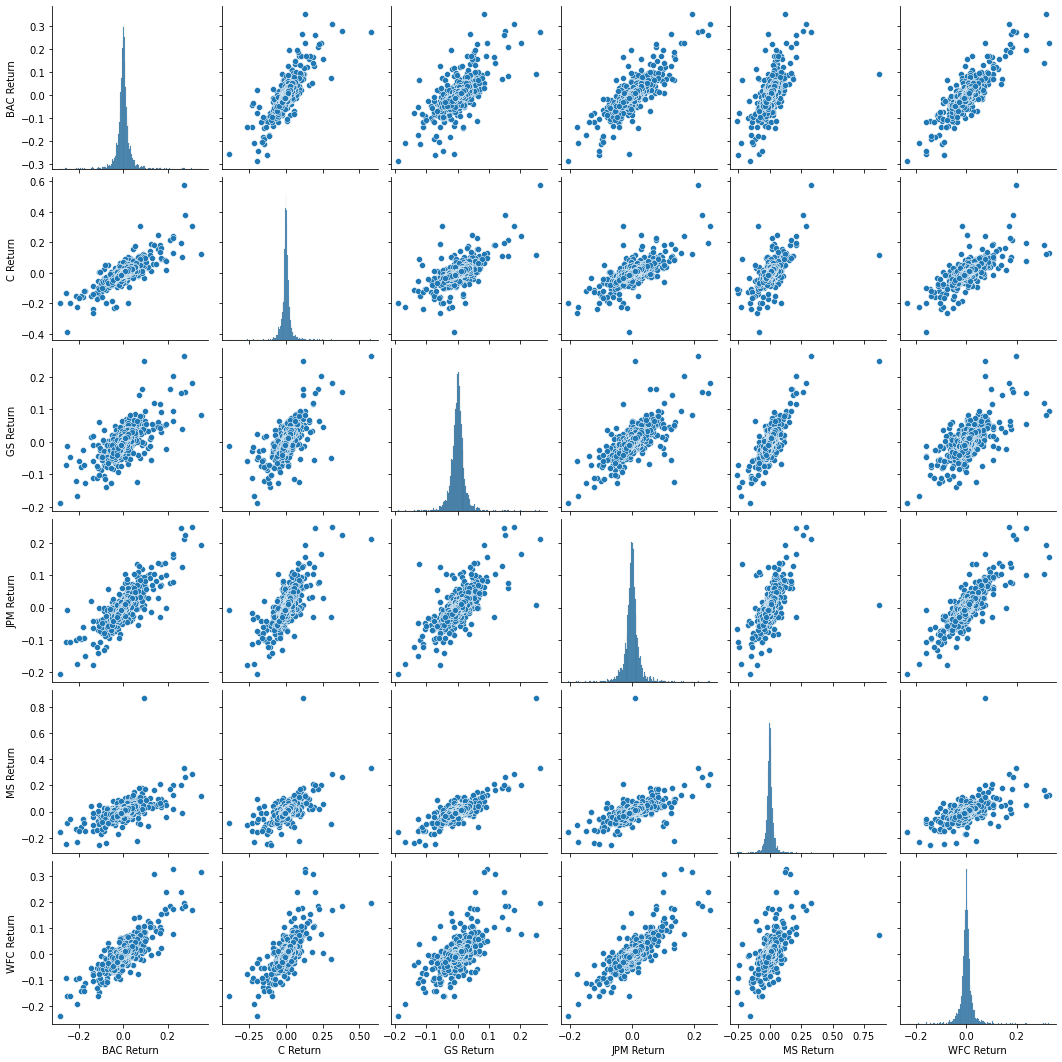

In [47]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [66]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [67]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [68]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025369
JPM Return    0.027669
MS Return     0.037705
WFC Return    0.030221
dtype: float64

In [75]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016148
C Return      0.015280
GS Return     0.014027
JPM Return    0.013965
MS Return     0.016008
WFC Return    0.012547
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

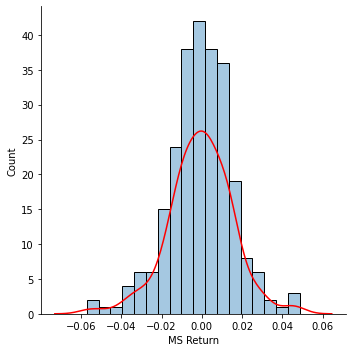

In [85]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], alpha=0.4)
sns.kdeplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='red')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



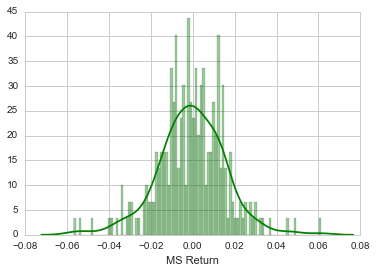

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\faari\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

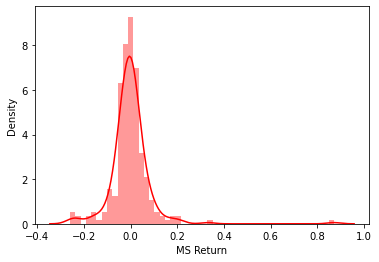

In [89]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['MS Return'], color='red')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



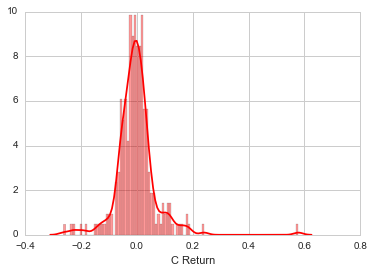

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

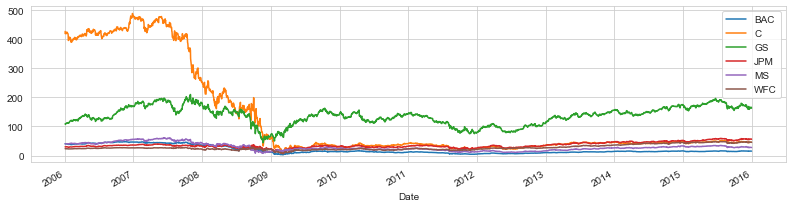

In [115]:
bank_stocks.xs('Close',level='Stock Info',axis=1).plot(figsize=(12,3))
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()

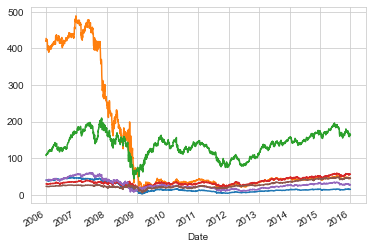

In [106]:
for i in tickers:
    bank_stocks[i]['Close'].plot()


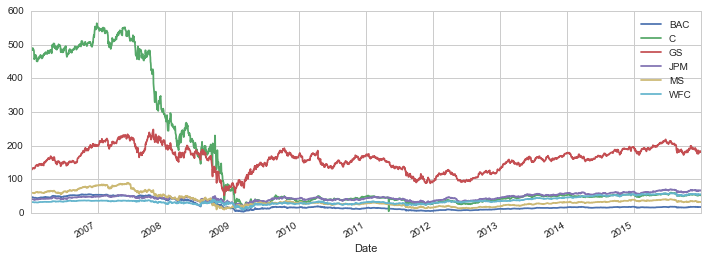

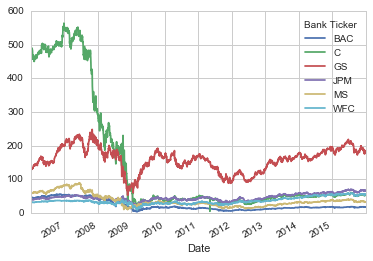

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<AxesSubplot:xlabel='Date'>

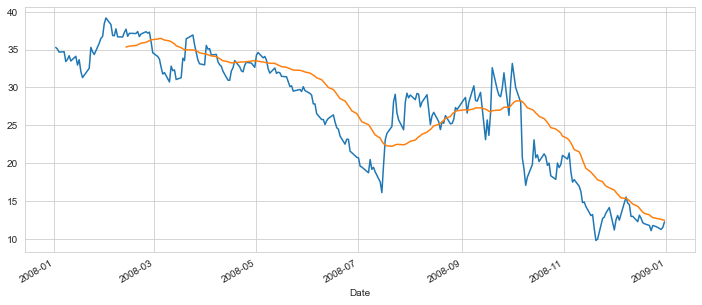

In [125]:
bank_stocks.loc['2008-01-01':'2008-12-31']['BAC']['Close'].plot(figsize=(12,5))

bank_stocks.loc['2008-01-01':'2008-12-31']['BAC']['Close'].rolling(window=30).mean().plot()

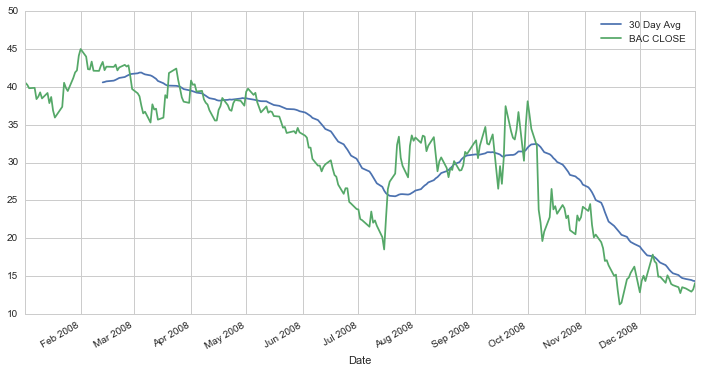

** Create a heatmap of the correlation between the stocks Close Price.**

In [133]:
cor = bank_stocks.xs('Close',level='Stock Info',axis=1).corr()
cor

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.970861,0.499726,0.019833,0.927576,-0.038153
C,0.970861,1.000000,0.376066,-0.081899,0.888668,-0.121582
GS,0.499726,0.376066,1.000000,0.691696,0.729949,0.557881
JPM,0.019833,-0.081899,0.691696,1.000000,0.245857,0.961907
MS,0.927576,0.888668,0.729949,0.245857,1.000000,0.159571
WFC,-0.038153,-0.121582,0.557881,0.961907,0.159571,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

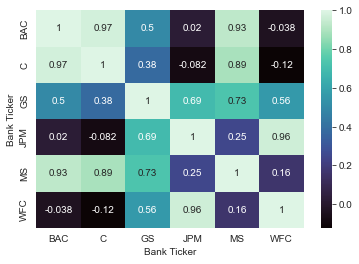

In [146]:
sns.heatmap(cor,cmap='mako', annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

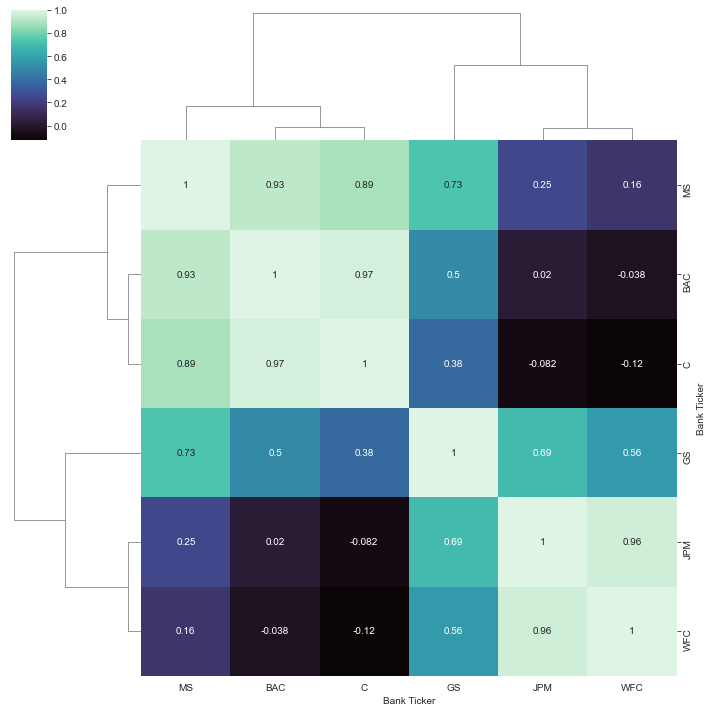

In [148]:
sns.clustermap(cor, annot=True, cmap='mako')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [158]:
BAC.iplot(kind='candle')

In [153]:
bank_stocks.loc['2015-01-01':'2016-01-01']['BAC'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [159]:
bank_stocks.loc['2015-01-01':'2015-12-31']["MS"]['Close'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [160]:
bank_stocks.loc['2015-01-01':'2015-12-31']["BAC"]['Close'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.